CS 675 Project

Part#1

Loading and understanding the dataset

In [48]:
# import pandas library
import pandas as pd

# loading the dataset
data = "telco-customer-churn.csv"
df_raw = pd.read_csv(data)

Display some basic info, summary statistics

In [49]:
# first few rows
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# Columns and Data types
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
# summary statistics
df_raw.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Judging by looking at the information. it seems multiple columns require transformation from object Dtype to numerical form. Furthermore, the dataset needs to be checked for missing values and outliers before proceeding with EDA.

Step 1: Preprocessing (Data preperation and cleaning, handle missing values, and, check for outliers)

In [52]:
# Checking for missing values
missing_values = df_raw.isnull().sum()
missing_values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
# Dropping "CustomerID" Column (it is simply an identifier and will not be used in EDA)
df = df_raw.drop(columns=["customerID"])

#Converting the column'TotalCharges' to numeric since it is currently Object Dtype.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Checking for missing values after conversion
missing_values_after_conversion = df.isnull().sum()
missing_values_after_conversion

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It seems their are 11 missing values in the column 'total charges' conversion to numeric Dtype.

In [54]:
# Showing entries with NaN in TotalCharges
total_charges_na = df[df['TotalCharges'].isna()]
total_charges_na

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [55]:
# Droping rows with missing TotalCharges values
df = df.dropna(subset=['TotalCharges'])
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Missing values within the column 'total charges' have been removed. Now transforming categorical and string values to numeric values.

In [56]:
# Converting Categorical Columns with Object Data type into Numeric Data type.
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for x in df:
    if df[x].dtype in ["int64", "float64"]:
        continue
    elif x in binary_columns:
            df[x] = df[x].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
    else:
        df[x] = df[x].astype('category').cat.codes

C:\Users\Asus\AppData\Local\Temp\ipykernel_51112\3863240605.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[x] = df[x].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
C:\Users\Asus\AppData\Local\Temp\ipykernel_51112\3863240605.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[x] = df[x].replace({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})
C:\Users\Asus\AppData\Local\Temp\ipykernel_51112\3863240605.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retai

Detecting Outliers

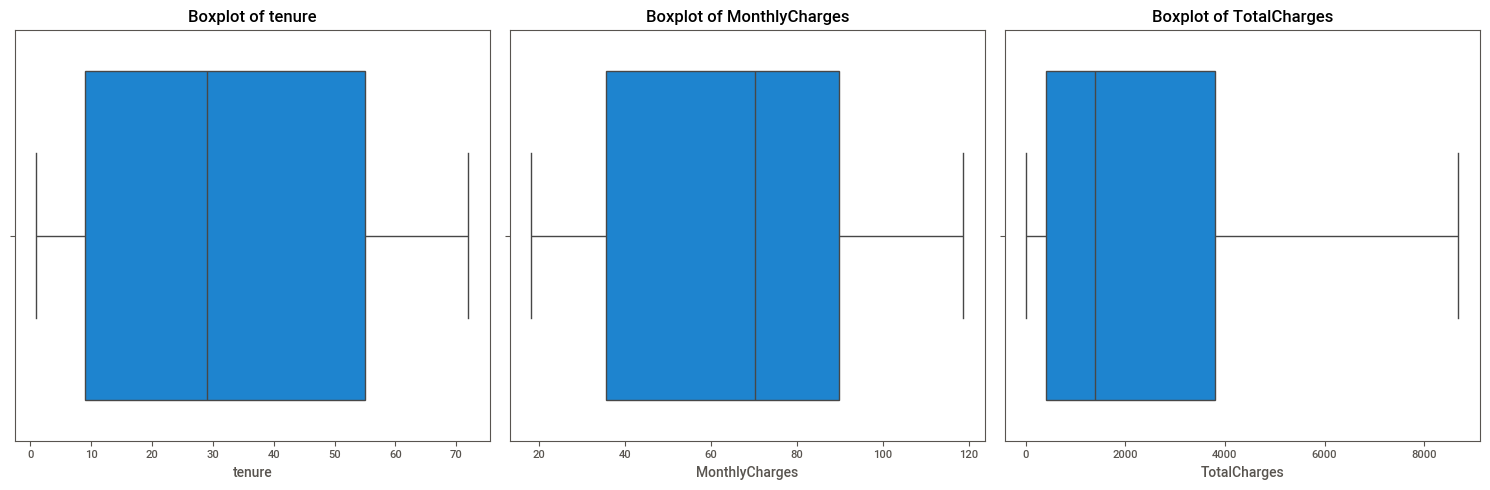

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking Numerical columns for outliers
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Creating boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Step 2: Listing all types of data, numeric, categorical, text.

In [58]:
# Lists for different types of columns
numeric_columns = []
categorical_columns = []
text_columns = []

all_data_types =  ['int64', 'float64', 'int8']
# Checking each column's data type
for column in df.columns:
    if df[column].dtype in all_data_types:
        numeric_columns.append(column)
    elif df[column].dtype == 'object':
        text_columns.append(column)
    else:
        categorical_columns.append(column)


# Displaying the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Categorical Columns: []
Text Columns: []


Step 3: Explanatory Data Analysis

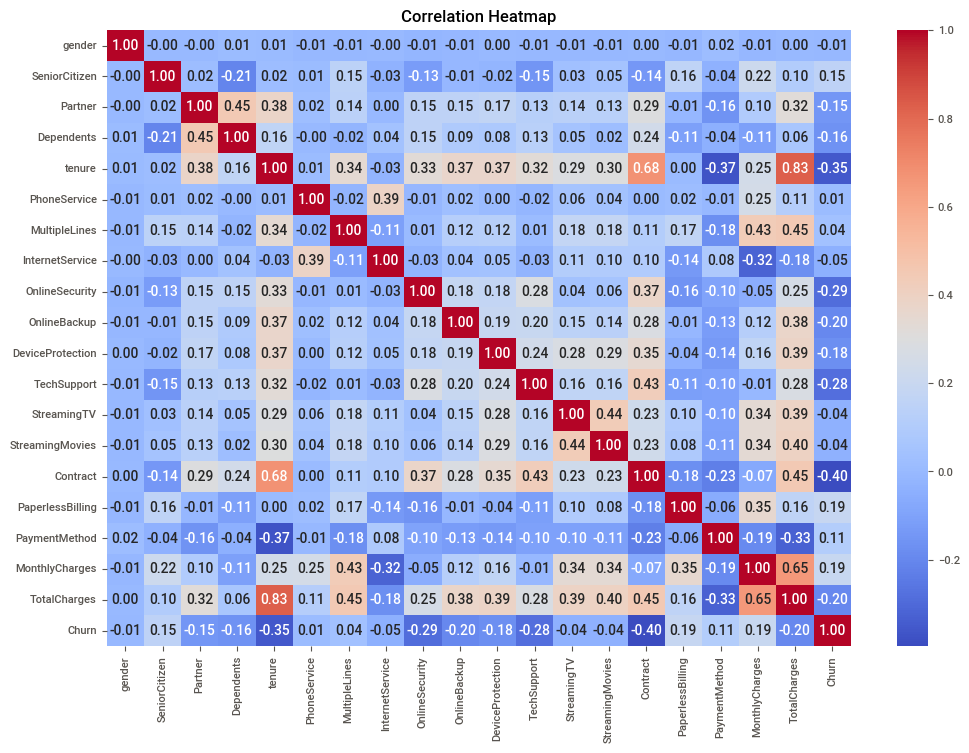

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=all_data_types)

# Correlation matrix
corr_matrix = numeric_df.corr()

# Heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Defining the features (X) and target (y) for numerical columns (excluding 'customer ID')
X = df.drop(columns=['Churn'])  
y = df['Churn']                               

# Splitting the dataset into training and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
feature_importance = clf.feature_importances_

# DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Displaying feature importance
print(feature_importance_df)

             Feature  Importance
18      TotalCharges    0.209653
17    MonthlyCharges    0.202489
14          Contract    0.174319
4             tenure    0.095162
8     OnlineSecurity    0.046879
16     PaymentMethod    0.046138
7    InternetService    0.034088
3         Dependents    0.022693
15  PaperlessBilling    0.022683
2            Partner    0.021707
9       OnlineBackup    0.019676
1      SeniorCitizen    0.018221
0             gender    0.016746
13   StreamingMovies    0.016491
6      MultipleLines    0.015425
10  DeviceProtection    0.013789
11       TechSupport    0.013088
12       StreamingTV    0.007657
5       PhoneService    0.003097


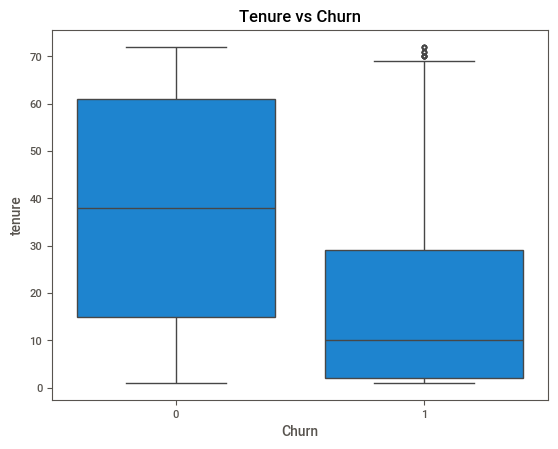

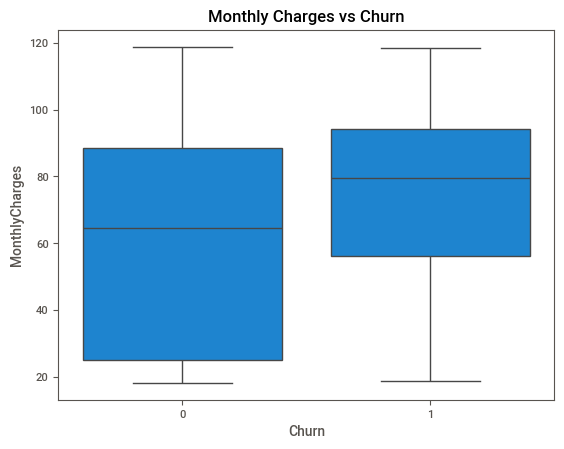

In [61]:
# Dstribution of important features vs Churn
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Tenure vs Churn')
plt.show()

sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges vs Churn')
plt.show()

Step 4: Split the dataset into training and test datasets (80/20 ratio). Using SweetViz’s ‘compare’ command contrast the training vs test datasets on the target (‘churn’)

training and testing

In [62]:
# Defining features X and y
X = df.drop(columns=['Churn', 'TotalCharges'])  # Features
y = df['Churn']                 # Target

# Splitting dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine X and y again for SweetViz comparison
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

SweetViz Report

In [63]:
import sweetviz as sv

# Analyze the training and test datasets.
comparison_report = sv.compare([train_data, "Training Data"], [test_data, "Test Data"], "Churn")

# HTML report
comparison_report.show_html("comparison_report.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:01 -> (00:00 left)


Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Part#2

Following the standard ML worflow
EDA, Visualization and Preprocessing already done in the previous part.

Model training and evaluation on original dataset without SMOTE

Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Naïve Bayes model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate performance
print("Naïve Bayes Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb))
print("Recall:", recall_score(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test, y_pred_nb))


Naïve Bayes Model Performance:
Accuracy: 0.7377398720682303
Precision: 0.5046382189239332
Recall: 0.7272727272727273
F1 Score: 0.5958378970427163


Logistic Regression

In [65]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=500, solver='liblinear')

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
print("\nLogistic Regression Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))


Logistic Regression Model Performance:
Accuracy: 0.7867803837953091
Precision: 0.6241610738255033
Recall: 0.49732620320855614
F1 Score: 0.5535714285714286


Random Forest Classifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.7775408670931059
Precision: 0.6101083032490975
Recall: 0.45187165775401067
F1 Score: 0.5192012288786483


XGBoost

In [67]:
from xgboost import XGBClassifier

# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("\nXGBoost Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall:", recall_score(y_test, y_pred_xgb))
print("F1 Score:", f1_score(y_test, y_pred_xgb))


XGBoost Model Performance:
Accuracy: 0.749822316986496
Precision: 0.5339506172839507
Recall: 0.4625668449197861
F1 Score: 0.49570200573065903


Applying SMOTE and retraining the models

In [68]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())


Class distribution after SMOTE:
 Churn
1    4130
0    4130
Name: count, dtype: int64


Naïve Bayes with SMOTE

In [69]:
# Retrain Naïve Bayes model on SMOTE data
nb_model.fit(X_train_smote, y_train_smote)
y_pred_nb_smote = nb_model.predict(X_test)

# Evaluate performance
print("\nNaïve Bayes Model Performance (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_nb_smote))
print("Precision:", precision_score(y_test, y_pred_nb_smote))
print("Recall:", recall_score(y_test, y_pred_nb_smote))
print("F1 Score:", f1_score(y_test, y_pred_nb_smote))



Naïve Bayes Model Performance (with SMOTE):
Accuracy: 0.7306325515280739
Precision: 0.4954128440366973
Recall: 0.7219251336898396
F1 Score: 0.5875952121871599


Logistic Regression with SMOTE

In [70]:
# Retrain Logistic Regression model on SMOTE data
lr_model.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_model.predict(X_test)

# Evaluate performance
print("\nLogistic Regression Model Performance (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_lr_smote))
print("Precision:", precision_score(y_test, y_pred_lr_smote))
print("Recall:", recall_score(y_test, y_pred_lr_smote))
print("F1 Score:", f1_score(y_test, y_pred_lr_smote))



Logistic Regression Model Performance (with SMOTE):
Accuracy: 0.7377398720682303
Precision: 0.5046554934823091
Recall: 0.7245989304812834
F1 Score: 0.5949506037321625


Random Forest with SMOTE

In [71]:
# Retrain Random Forest model on SMOTE data
rf_model.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_model.predict(X_test)

# Evaluate performance
print("\nRandom Forest Model Performance (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_smote))
print("Precision:", precision_score(y_test, y_pred_rf_smote))
print("Recall:", recall_score(y_test, y_pred_rf_smote))
print("F1 Score:", f1_score(y_test, y_pred_rf_smote))



Random Forest Model Performance (with SMOTE):
Accuracy: 0.759772565742715
Precision: 0.5454545454545454
Recall: 0.5775401069518716
F1 Score: 0.561038961038961


XGBoost with SMOTE

In [72]:
# Retrain XGBoost model on SMOTE data
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_model.predict(X_test)

# Evaluate performance
print("\nXGBoost Model Performance (with SMOTE):")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_smote))
print("Precision:", precision_score(y_test, y_pred_xgb_smote))
print("Recall:", recall_score(y_test, y_pred_xgb_smote))
print("F1 Score:", f1_score(y_test, y_pred_xgb_smote))



XGBoost Model Performance (with SMOTE):
Accuracy: 0.751954513148543
Precision: 0.5287356321839081
Recall: 0.6149732620320856
F1 Score: 0.5686032138442522


Hyper Parameter Model tuning 

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=500), param_grid_lr, cv=5, scoring='f1')
grid_search_lr.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best F1 Score for Logistic Regression:", grid_search_lr.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'solver': 'lbfgs'}
Best F1 Score for Logistic Regression: 0.7924900063896922


In [74]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='f1')
grid_search_rf.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best F1 Score for Random Forest:", grid_search_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best F1 Score for Random Forest: 0.8403979306873005


In [75]:
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid_xgb, cv=5, scoring='f1')
grid_search_xgb.fit(X_train_smote, y_train_smote)

# Best parameters and score
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best F1 Score for XGBoost:", grid_search_xgb.best_score_)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best F1 Score for XGBoost: 0.8353820413957849


Conclusions on Customer Churn from ML models

1. Churn Prediction:

Machine learning models are able to identify patterns in customer data that indicate churn risk, allowing the company to predict which customers may be loyal and which are likely to leave.

Using SMOTE to balance the dataset improved model performance, especially recall, by better identifying churn-prone customers, thus providing a more reliable prediction tool.

2. Key Influencing Factors:

Tenure: Customers with shorter tenure are more likely to churn, suggesting that the initial customer relationship phase is critical.

Contract Type: Month-to-month contracts are associated with higher churn. Promoting longer-term contracts could reduce churn.

Monthly Charges: Higher charges increase churn probability, indicating a price sensitivity that could be mitigated by offering better-value bundles or incentives for high-paying customers.

Service Features: Customers who subscribe to services like tech support or streaming are less likely to churn, showing that bundling valuable services may improve retention.

3. Insight

Targeting customers on month-to-month contracts with loyalty incentives or promoting additional services to new customers could be effective retention strategies. 

Focuing on acquiring customers with similar characteristics to those of loyal customers, such as those more likely to benefit from bundled services or long-term plans. 

Prioritizing long-term contracts and highlight valuable add-on services like tech support